# Lecture 8 Notes: Overfitting, Underfitting, and Cross Validation

### Setup imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


### Load Data

In [13]:
digits = datasets.load_digits()
print(len(digits.data))
print(len(digits.target))

1797
1797


### visualize a digit

0


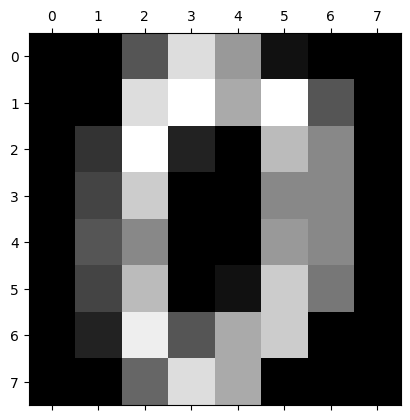

In [17]:
plt.matshow(digits.images[0])
print(digits.target[0])
plt.gray()

### Prepare the data

In [ ]:
X = digits.data
y = digits.target


array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

### Do train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train

array([[ 0.,  0.,  5., ..., 10.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ..., 16., 11.,  2.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]], shape=(1257, 64))

### Define Hyperparameter Grid

In [27]:
hyperparameter_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
}
hyperparameter_grid

{'C': [0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf'],
 'gamma': ['scale', 'auto']}

### Define the model and grid search

In [ ]:
model = SVC()

grid_search = GridSearchCV(model, hyperparameter_grid, cv=5,return_train_score=True)


### Run the Grid Search

In [29]:
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the

### Review the Results

In [30]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

### Train a Model wit Best Parameters

In [ ]:
best_model = SVC(C=10, gamma='scale', kernel='rbf')

best_model.fit(X_train, y_train)



,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


### make test Set Predictions

In [ ]:
y_pred = best_model.predict(X_test)


### Check Predictions

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.97      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### Look at grid search results

In [46]:
results = grid_search.cv_results_
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']
param_sets = results['params']
for mean_train_score, mean_test_score, params in zip(train_scores, test_scores, param_sets ):
    print(params, mean_test_score, mean_train_score)


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} 0.9427243407323088 0.9560458146642532
{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.10580218807310442 0.12590724310851312
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} 0.9825080629861507 0.9964206799006952
{'C': 1, 'gamma': 'auto', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'} 0.41208499335989374 1.0
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 0.9904603806994245 1.0
{'C': 10, 'gamma': 'auto', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 0.4646145576424461 1.0
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'} 0.9681749193701386 1.0
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'} 0.9904